In [1]:
# Importing Libraries for Data Analysis and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wordcloud
import re
sns.set_theme()
%matplotlib inline

import warnings as w
w.filterwarnings('ignore')

In [9]:
airline_df = pd.read_csv('airline_df_cleaned.csv')
airline_df.drop('Recommended', axis=1, inplace=True)
airline_df.head(10)

,Airline,Country,Review,Date_Published,Type of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value for Money,Sentiment
0,Air China,China,los angeles to beijing return. food low qualit...,2012-01-30,Solo Leisure,Economy Class,3,2,2,1,1,3,Negative
1,Air China,China,round to trip from hong kong to munich. the ma...,2012-01-31,Solo Leisure,Economy Class,1,3,1,1,1,3,Negative
2,Air China,China,sydney to beijing to paris then rome to beijin...,2012-02-03,Solo Leisure,Economy Class,2,3,1,2,1,3,Negative
3,Air China,China,london to sydney return via beijing. a cheap f...,2012-02-22,Solo Leisure,Economy Class,4,1,2,4,3,4,Negative
4,Air China,China,beijing to shanghai. only one check to in desk...,2012-02-28,Solo Leisure,Economy Class,4,4,3,3,3,4,Positive
5,Air China,China,stockholm to bangkok via beijing. return fligh...,2012-03-13,Solo Leisure,Economy Class,2,1,1,1,1,3,Negative
6,Air China,China,vancouver to hong kong via beijing. seating wa...,2012-03-19,Solo Leisure,Economy Class,4,3,4,4,3,4,Positive
7,Air China,China,vancouver to beijing return in economy. my veg...,2012-03-21,Solo Leisure,Economy Class,3,4,4,3,3,4,Positive
8,Air China,China,hong kong to bjs on a321. old looking plane bu...,2012-03-26,Solo Leisure,Economy Class,4,4,3,2,4,4,Positive
9,Air China,China,dus to beijing to manila return. 2.5 hours del...,2012-03-26,Solo Leisure,Economy Class,3,1,2,3,2,2,Negative


In [10]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15206 entries, 0 to 15205
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 15206 non-null  object
 1   Country                 15206 non-null  object
 2   Review                  15206 non-null  object
 3   Date_Published          15206 non-null  object
 4   Type of Traveller       15206 non-null  object
 5   Seat Type               15206 non-null  object
 6   Seat Comfort            15206 non-null  int64 
 7   Cabin Staff Service     15206 non-null  int64 
 8   Food & Beverages        15206 non-null  int64 
 9   Inflight Entertainment  15206 non-null  int64 
 10  Ground Service          15206 non-null  int64 
 11  Value for Money         15206 non-null  int64 
 12  Sentiment               15206 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.5+ MB


In [11]:
airline_df.describe(include='all')

,Airline,Country,Review,Date_Published,Type of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value for Money,Sentiment
count,15206,15206,15206,15206,15206,15206,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000,15206
unique,19,9,15205,3718,4,4,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Emirates,India,trip verified very attentive staff at airport ...,2015-01-14,Solo Leisure,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,Positive
freq,2263,3637,2,39,6219,11369,NaN,NaN,NaN,NaN,NaN,NaN,8907
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.371169,3.502433,3.148691,3.227542,3.074905,3.365645,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.376056,1.547864,1.475143,1.389885,1.549484,1.527238,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,NaN


## Questions for Data Analysis on Airline Reviews, Ratings and Sentiment (Dashboards)
> #### 1. What is the distribution of Seat_Comfort, Cabin_Service, Food_Bev, Entertainment, Ground_Service, and Value_for_Money of each Airline?
> #### 2. What is the distribution of Type of Traveller, Seat Type, Route, and Date Flown of each airline?
> #### 3. What is the distribution of Ratings of each airline?
> #### 4. What is the distribution of Sentiment of each airline?
> #### 5. What is the distribution of Ratings of each airline by Type of Traveller, Seat Type, Country, Airline?

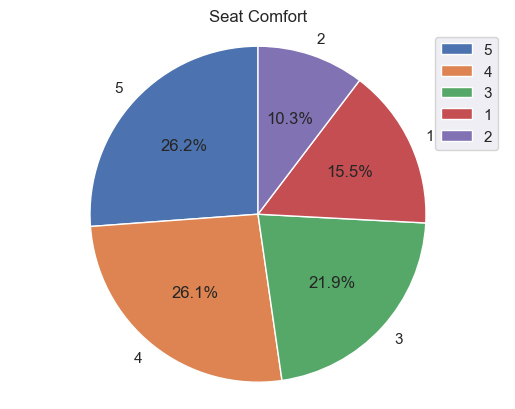

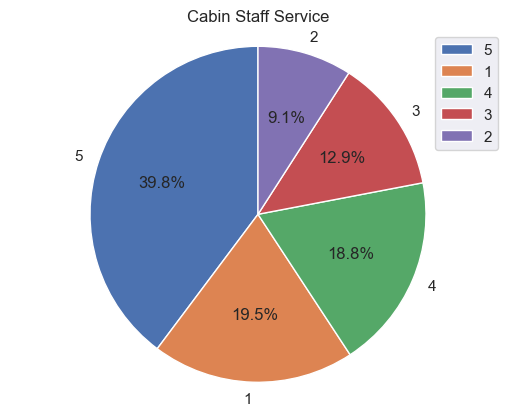

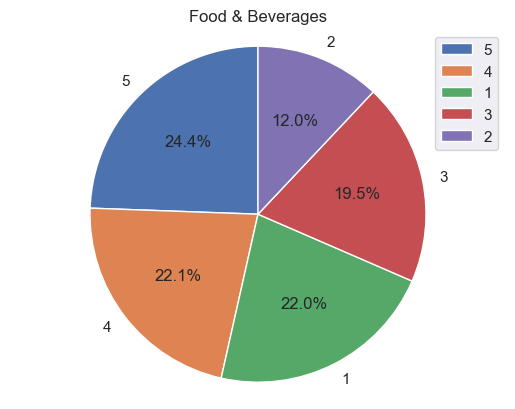

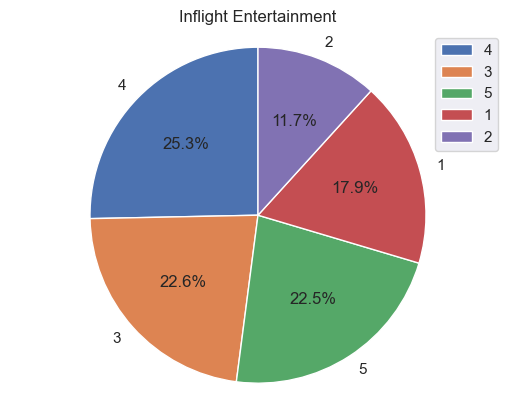

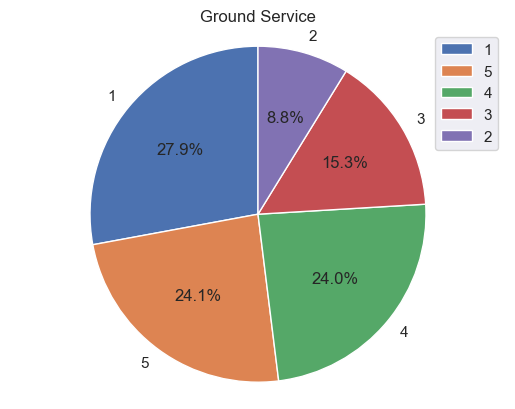

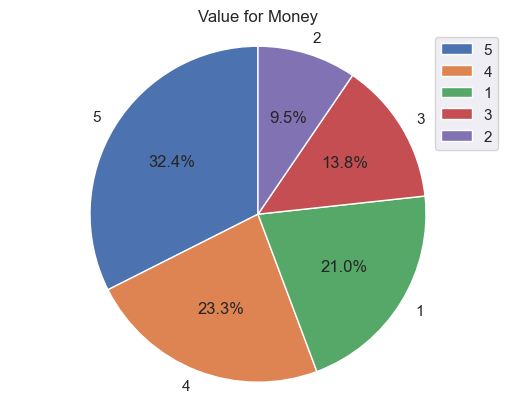

In [13]:
# Pie chart of sentiment distribution
for col in ["Seat Comfort",
        "Cabin Staff Service",
        "Food & Beverages",
        "Inflight Entertainment",
        "Ground Service",
        "Value for Money",
    ]:
        plt.pie(airline_df[col].value_counts(), labels=airline_df[col].value_counts().index,autopct='%1.1f%%', startangle=90)
        plt.title(col)
        plt.axis('equal')
        plt.legend()
        plt.show()